###Unidade 8  - Recuperação da Informação
Aluno(a): Tainá da Silva Lima
<br>
DRE: 116165607
<br><br>
Aluno(a): Rafael Pais Cardoso
<br>
DRE: 116140788
<br><br>
Professor(a): Giseli Lopes
<br>
Período: 2020.4 PLE

# Importando as bibliotecas necessárias aos exercícios realizados nesse trabalho

In [ ]:
import numpy as np
import math
from prettytable import PrettyTable
import matplotlib.pyplot as plt

#Enunciado
Considere o grafo da Figura abaixo, que
representa a estrutura de links entre páginas
Web, para resolver o item a seguir.


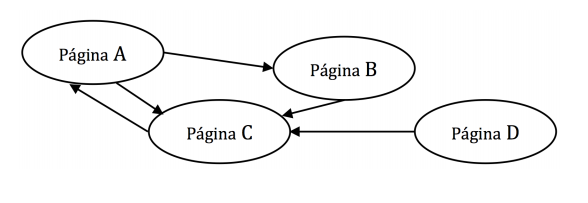

Considere as etapas a seguir para o cálculo do
PageRank, conforme apresentado em [Easley &
Kleinberg, 2010]:

– Em um grafo com T páginas, associe a todas as T páginas o
mesmo valor inicial de PageRank, setando-o como 1/T. <br>
– Escolha um valor de threshold (nesse caso, 0.0001). <br>
– Efetue uma sequência de atualizações para os T valores de
PageRank até que os valores atinjam a convergência para o
threshold escolhido.

O PageRank [Page et al., 1998] (slide 41) de cada página será
determinado pela equação a seguir:

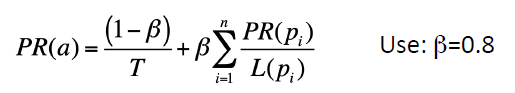



# Resolução

O PageRank da "Página A" está sendo representada pela letra "A"
<br>
O PageRank da "Página B" está sendo representada pela letra "B"
<br>
O PageRank da "Página C" está sendo representada pela letra "C"
<br>
O PageRank da "Página D" está sendo representada pela letra "D"
<br>
<br>
Sistema de equações que refletem os valores de PageRank das páginas
<br>
A = C
<br>
B = A/2
<br>
C = D + B + A/2
<br>
D = 0
<br>
<br>
Abaixo temos uma representação do grafo com os valores de PageRank

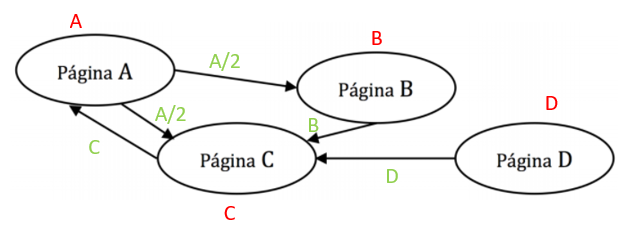

## Implementação 

In [ ]:
PR_THRESHOLD = 0.001 
ITERATION_THRESHOLD = 1000
BETA = 0.8
N_PAGES = 4

def pageRank(incidenceMatrix, pageRankValues):
  prevValue = np.copy(pageRankValues)
  
  M = BETA * incidenceMatrix + ((1 - BETA) / N_PAGES)

  iteratorCount = 0
  while(iteratorCount < ITERATION_THRESHOLD):
    iteratorCount   = iteratorCount + 1
    pageRankValues  = M @ pageRankValues

    if(np.allclose(pageRankValues, prevValue, atol = PR_THRESHOLD)):
      break

    prevValue = np.copy(pageRankValues)

  return pageRankValues


pageMatrix = np.array([[0, 0, 1, 0],
                      [1/2, 0, 0, 0],
                      [1/2, 1, 0, 1],
                      [0, 0, 0, 0]])


pageRankValues = np.ones( [N_PAGES, 1] )/N_PAGES

result = pageRank(pageMatrix, pageRankValues)

print("Matriz com os valores dos votos:")

x = PrettyTable()

column_names = ["OUT/IN", "Página A", "Página B", "Página C", "Página D"]

x.add_column(column_names[0], ["Página A", "Página B", "Página C", "Página D"])

for i in range(N_PAGES):
  x.add_column(column_names[i+1], pageMatrix[:,i])
print(x)


print("Valores de PageRank de chute:")
y = PrettyTable()

column_names = ["Página", "PageRank"]

y.add_column(column_names[0], ["A", "B", "C", "D"])
y.add_column(column_names[1], [j[0]  for j in pageRankValues])

print(y)

print("Valores de PageRank calculados:")
z = PrettyTable()

column_names = ["Página", "PageRank"]

z.add_column(column_names[0], ["A", "B", "C", "D"])
z.add_column(column_names[1], [i[0]  for i in result] )

print(z)


Matriz com os valores dos votos:
+----------+----------+----------+----------+----------+
|  OUT/IN  | Página A | Página B | Página C | Página D |
+----------+----------+----------+----------+----------+
| Página A |   0.0    |   0.0    |   1.0    |   0.0    |
| Página B |   0.5    |   0.0    |   0.0    |   0.0    |
| Página C |   0.5    |   1.0    |   0.0    |   1.0    |
| Página D |   0.0    |   0.0    |   0.0    |   0.0    |
+----------+----------+----------+----------+----------+
Valores de PageRank de chute:
+--------+----------+
| Página | PageRank |
+--------+----------+
|   A    |   0.25   |
|   B    |   0.25   |
|   C    |   0.25   |
|   D    |   0.25   |
+--------+----------+
Valores de PageRank calculados:
+--------+---------------------+
| Página |       PageRank      |
+--------+---------------------+
|   A    | 0.36332910284800024 |
|   B    | 0.19500951859200014 |
|   C    |  0.3916613785600003 |
|   D    | 0.05000000000000002 |
+--------+---------------------+
